In [18]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib as mpl


# 운영체제에 맞게 한글을 지원하는 폰트를 설정합니다.
if platform.system() == 'Windows':
    # Windows의 경우 'Malgun Gothic'을 많이 사용합니다.
    mpl.rcParams['font.family'] = 'Malgun Gothic'
    
    

# 파일 경로에 있는 CSV 파일을 읽어옵니다.
df = pd.read_csv("./data/Advertising.csv",index_col=0)

데이터의 첫 5행:
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

요약 통계량:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 no

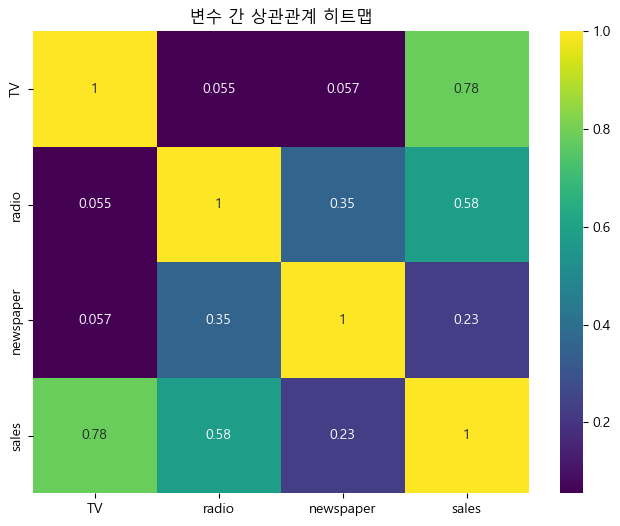

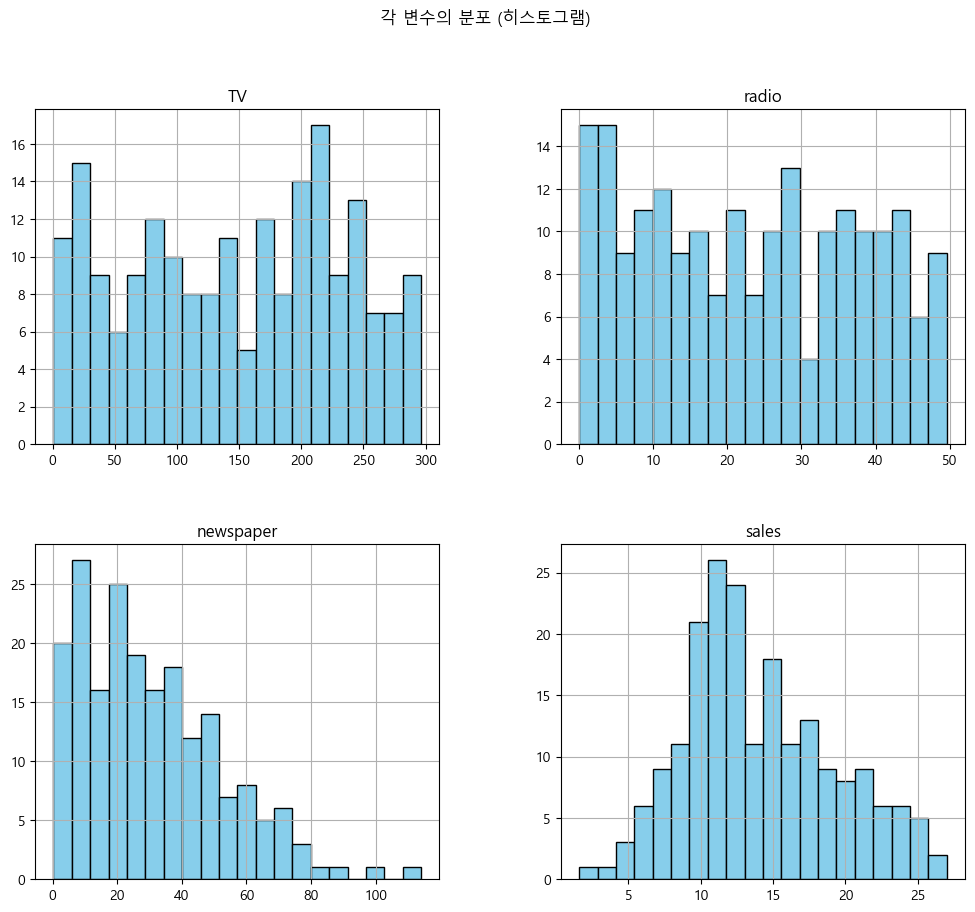

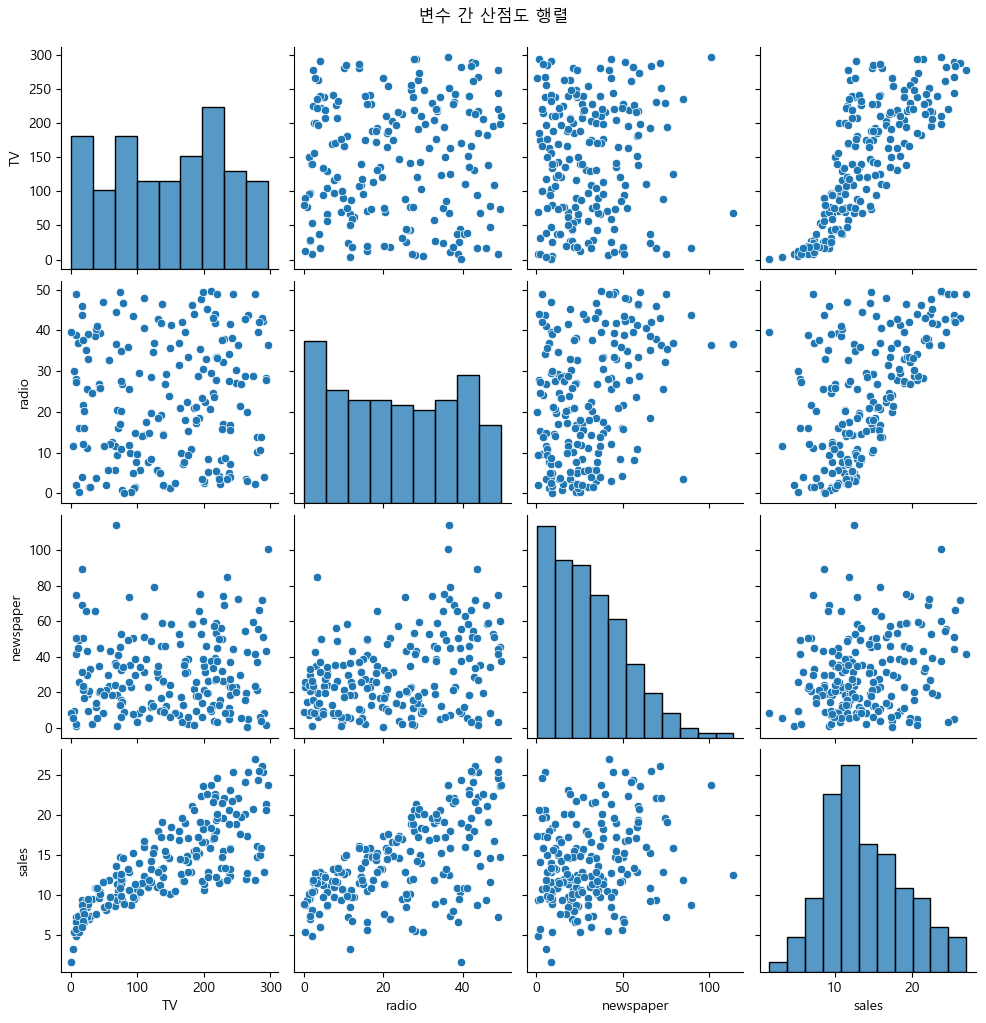

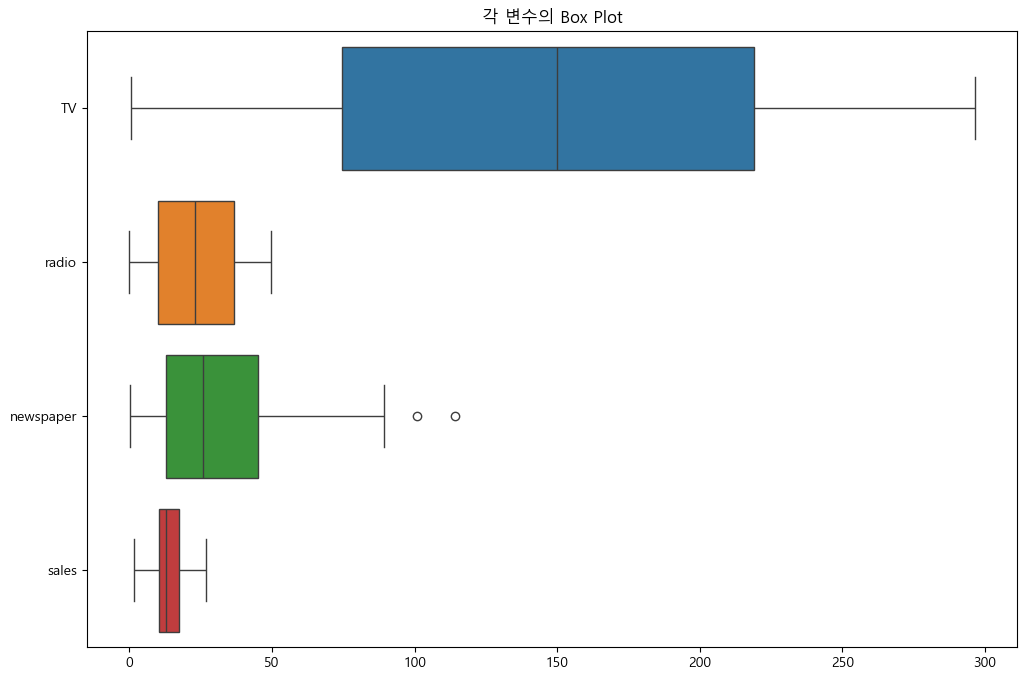

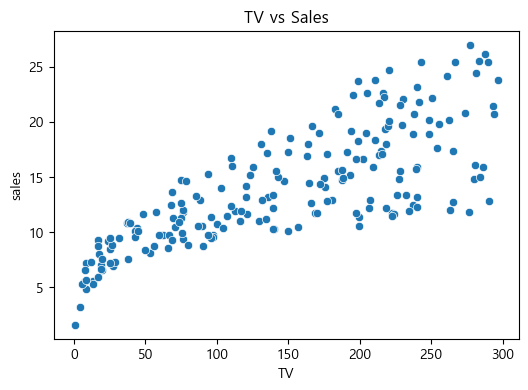

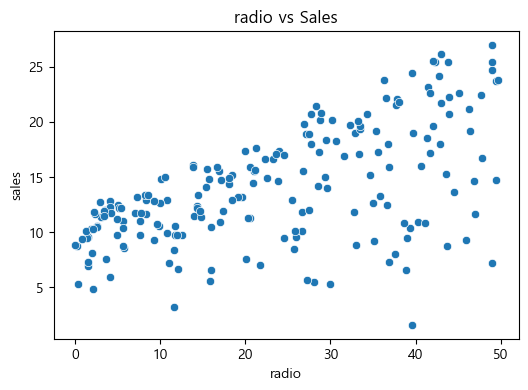

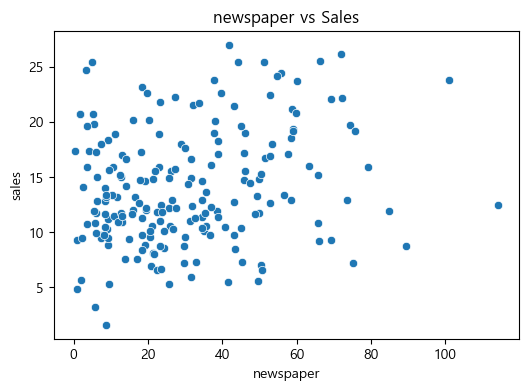

In [14]:
# 데이터셋의 첫 5행을 출력하여 데이터 구조를 확인합니다.
print("데이터의 첫 5행:")
print(df.head())

# 데이터셋의 기초 통계량(평균, 표준편차, 최소/최대 값 등)을 확인합니다.
print("\n요약 통계량:")
print(df.describe())

# 데이터셋의 정보를 확인합니다. (컬럼명, 자료형, 결측치 유무 등)
print("\n데이터 정보:")
print(df.info())

# 각 컬럼별 결측치(누락된 값)가 있는지 확인합니다.
print("\n결측치 개수:")
print(df.isnull().sum())

# 변수 간 상관관계 행렬을 계산하여 출력합니다.
corr_matrix = df.corr()
print("\n상관관계 행렬:")
print(corr_matrix)

# 상관관계 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title("변수 간 상관관계 히트맵")
plt.show()

# 각 변수의 분포를 히스토그램으로 확인합니다.
df.hist(bins=20, figsize=(12,10), color="skyblue", edgecolor="black")
plt.suptitle("각 변수의 분포 (히스토그램)")
plt.show()

# 변수 간 관계를 한눈에 보기 위해 Pair Plot(산점도 행렬)을 생성합니다.
sns.pairplot(df)
plt.suptitle("변수 간 산점도 행렬", y=1.02)
plt.show()

# Box Plot을 사용하여 각 변수의 분포와 이상치(outlier)를 확인합니다.
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="h")
plt.title("각 변수의 Box Plot")
plt.show()

# 'Sales'와 다른 광고 채널(TV, Radio, Newspaper) 간의 관계를 산점도로 각각 시각화합니다.
features = ["TV", "radio", "newspaper"]
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df["sales"])
    plt.title(f"{feature} vs Sales")
    plt.xlabel(feature)
    plt.ylabel("sales")
    plt.show()

In [1]:
# 학습셋과 평가셋 분리를 위한 코드
import pandas as pd
from sklearn.model_selection import train_test_split

# 파일 불러오기
df = pd.read_csv("./data/outlier_removed_Advertising.csv", index_col=0)

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns='sales')
y = df['sales']

# 학습셋 80%, 평가셋 20%로 분리 (random_state 고정으로 재현 가능하게 함)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((158, 3), (40, 3), (158,), (40,))